In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Definition of the model

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, gamma,beta1,beta2,t_tresh=22):
    S,I,R = y

    if t<=t_tresh:
        B=beta1
    elif t>t_tresh and t<=1000:
        B=beta1*np.exp(-(t-t_tresh)/beta2)
    elif t>1000:
        B=0.2*np.exp(-(t-1000)/beta2)
    
    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

# Integration of the differential equations

In [3]:
def time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,(1-death_rate/100)*R,R*death_rate/100)

# Selecting italian region

In [29]:
###########################################################################    
fit_region = 'nord' # OPTIONS: 'nord', 'centro', 'sud', 'isole', 'italia', 'nolombardia', 'lombardia'
###########################################################################

# Load data

In [30]:
if fit_region =='nord':
    region    = ['Lombardia','Veneto','Emilia-Romagna','Liguria','Piemonte','Valle d\'Aosta','P.A. Trento','P.A. Bolzano','Friuli Venezia Giulia'] 
    n_regions = len(region)
elif fit_region =='centro':
    region    = ['Toscana','Marche','Umbria','Lazio','Abruzzo','Molise']
    n_regions = len(region)
elif fit_region =='sud':
    region    = ['Puglia','Calabria','Basilicata','Campania']
    n_regions = len(region)
elif fit_region =='isole':
    region    = ['Sicilia','Sardegna']
    n_regions = len(region)

elif  fit_region =='italia': 
    region    = 'Italia'
    n_regions = 1
elif fit_region =='nolombardia':
    region    = ['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna','Friuli Venezia Giulia','Lazio','Liguria','Marche','Molise','Piemonte','Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto']
    n_regions = len(region)    
elif fit_region =='lombardia':
    region    = ['Lombardia']
    n_regions = 1     

    
popolation_regions = np.array([  1304970,      559084,        533050,   1947131,   5801692,         4459477,                1215220,5879082, 1550640,    10060574,  1525271,  305617,    4356406, 4029053, 1639591,  4999891,  3729641,       541380,  882015,          125666, 4905854])
name_regions       = np.array(['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna','Friuli Venezia Giulia','Lazio','Liguria','Lombardia','Marche','Molise','Piemonte','Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto'])
regions            = np.vstack((name_regions,popolation_regions))

mask_reg = []
for i in range(n_regions):
    mask_reg.append(regions[0,:] == region[i])
mask_reg = np.array(mask_reg)
print(mask_reg.shape)

if region=='Italia':
    data = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
    xdata=pd.to_numeric(range(data.shape[0]))
    ydata=data['totale_casi']
    ydata_death=data['deceduti']
    ydata_rec=data['dimessi_guariti']
    N = 60351305
    print('Popolation in the selected regions',N)
    print('ydata ',ydata, ydata.shape)
    print('xdata ',xdata,ydata.shape)
    
else:
    
    data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
    N = 0
    xxx = []
    yyy = []
    zzz = []
    for i in range(n_regions):
        N += int(regions[1,mask_reg[i]])
        mask_REG=data['denominazione_regione']==region[i]
        xxx.append(data.loc[mask_REG,'totale_casi'])
        yyy.append(data.loc[mask_REG,'deceduti'])
        zzz.append(data.loc[mask_REG,'dimessi_guariti'])

    ydata       = np.array(np.sum(xxx,axis=0))
    ydata_death = np.array(np.sum(yyy,axis=0))
    ydata_rec   = np.array(np.sum(zzz,axis=0))
    xdata       = pd.to_numeric(range(ydata.shape[0]))
    
    print('Popolation in the selected regions',N)
    print('ydata ',ydata, ydata.shape)
    print('ydata_death ',ydata_death, ydata_death.shape)
    print('ydata_rec ',ydata_rec, ydata_rec.shape)
    print('xdata ',xdata,ydata.shape)
print(popolation_regions.sum())

(9, 21)
Popolation in the selected regions 27748267
ydata  [   226    314    391    633    858   1077   1613   1945   2345   2856
   3523   4197   5304   6575   8208   8997  11035  13315  15436  18324
  21193  23937  26736  30138  34346  39055  44531  48838  52656  56819
  60791  65575  70334  74782  78638  81437  84492  88244  91593  95043
  98940 102340 105129 107450 110352 113732 116799 120601 123884 126419
 128800 130917 133865 136674 139582 142061 143830 146055 148895] (59,)
ydata_death  [    7    10    12    17    21    29    34    51    77   102   143   191
   224   353   444   607   795   970  1211  1367  1705  2032  2353  2788
  3148  3723  4444  5009  5523  6161  6723  7285  8157  8937  9590 10293
 11011 11640 12282 12896 13493 13931 14466 14980 15433 15961 16421 16966
 17324 17813 18321 18801 19240 19736 20156 20537 20914 21349 21716] (59,)
ydata_rec  [    0     0     0    40    40    44    77   143   154   269   407   516
   582   614   714   984  1010  1218  1388  1895  22

# Printing raw data

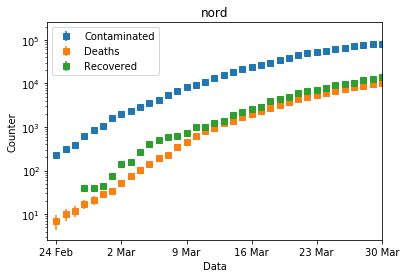

In [31]:
plt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='None',label='Deaths',marker='s')
plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='None',label='Recovered',marker='s')
plt.title(fit_region)
plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Counter')
plt.xticks(np.arange(0,50,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar'])
plt.xlim(-1,35)
plt.legend()
plt.savefig('output/Data_only_'+fit_region+'.png',dpi=300)
plt.show()

# Comparison between model and data

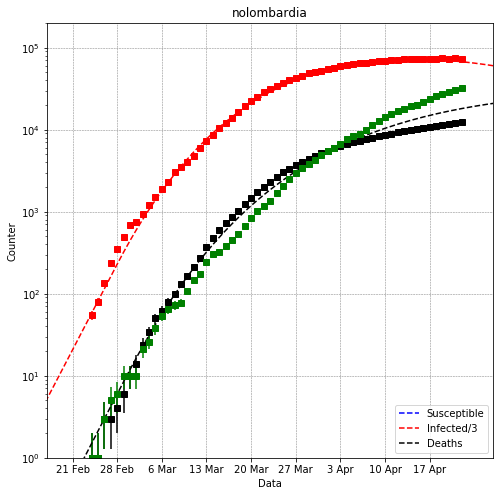

In [28]:
if fit_region =='nord':
    fin_result=time_evo(N,0.41,27.65,1/14,5.5,t_tresh=17,I0=2,t=np.arange(0,720)) # Nord + 0 giorni
    dt = 0
elif fit_region =='centro':
    fin_result=time_evo(N,0.41,24.65,1/14,3.4,t_tresh=14.4,I0=2,t=np.arange(0,720)) # Centro + 12 giorni
    dt = 10
elif fit_region =='sud':
    fin_result=time_evo(N,0.41,29.14,1/14,2.5,t_tresh=9,I0=2,t=np.arange(0,720))  # Sud + 12 giorni
    dt = 12
elif fit_region =='isole':
    fin_result=time_evo(N,0.41,27.25,1/14,2,t_tresh=7.8,I0=2,t=np.arange(0,720)) # Isole + 16 giorni
    dt = 16    
    
elif  fit_region =='italia': 
    fin_result=time_evo(N,0.415,28,1/14,6.5,t_tresh=17,I0=2,t=np.arange(0,720)) # Italia
    dt = 0
if fit_region =='nolombardia':
    fin_result=time_evo(N,0.415,26.5,1/14,4.2,t_tresh=17,I0=2,t=np.arange(0,720)) # Nord + 0 giorni
    dt = 4
if fit_region =='lombardia':
    fin_result=time_evo(N,0.415,25.9,1/14,8,t_tresh=17,I0=1,t=np.arange(0,720)) # Nord + 0 giorni
    dt = 0

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

ydata_inf=ydata-ydata_rec-ydata_death

plt.figure(figsize=(8,8))
plt.title(fit_region)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t+dt, s_vec, 'b--', label='Susceptible')
plt.plot(t+dt, i_vec/3, 'r--', label='Infected/3')
#plt.plot(t+dt, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t+dt, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14,72,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'])
plt.xlim(10,80)
plt.ylim(1,2*10**5)

#plt.xlim(50,80)
#plt.ylim(2*10**4,2*10**5)

plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('output/sirdatacomp_v3_'+fit_region+'.png',dpi=300)
plt.show()




if fit_region == 'nolombardia': 
    xdata_NoLombardia  = xdata+17
    ydata_NoLombardia  = ydata_inf
    xmodel_NoLombardia = t+dt
    ymodel_NoLombardia = i_vec/3
elif fit_region == 'lombardia': 
    xdata_Lombardia  = xdata+17
    ydata_Lombardia  = ydata_inf
    xmodel_Lombardia = t+dt
    ymodel_Lombardia = i_vec/3

# Percentage variation of the contaminted people

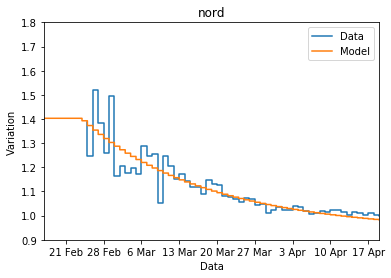

In [8]:
# data increment
incremento=[]
for i in range(1,len(ydata)):
    if ydata_inf[i] > 1:
        incremento.append(ydata_inf[i]/ydata_inf[i-1])
        
# sir increment
incr_SIR=[]
for i in range(len(i_vec)-1):
    incr_SIR.append(i_vec[i+1]/i_vec[i])

#general increment (function)
def incr_SIR_fun(N,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720)):
    fin_result=time_evo(N,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720))
    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]
    
    incr_SIR=[]
    for i in range(len(i_vec)-1):
        incr_SIR.append(i_vec[i+1]/i_vec[i])
        
    return np.array(incr_SIR)


if fit_region   == 'Sud':
    plt.step(xdata[ydata>=1]+17,incremento,label='Data')
else:
    plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:]+dt,incr_SIR,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.title(fit_region)
plt.xticks(np.arange(14,72,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'])
plt.xlim(10,72)
plt.ylim(0.9,1.8)
plt.legend()
plt.savefig('output/first_derivative_SIR_band_v3_'+fit_region+'.png',dpi=300)
plt.show()

# Predictions (best fit)

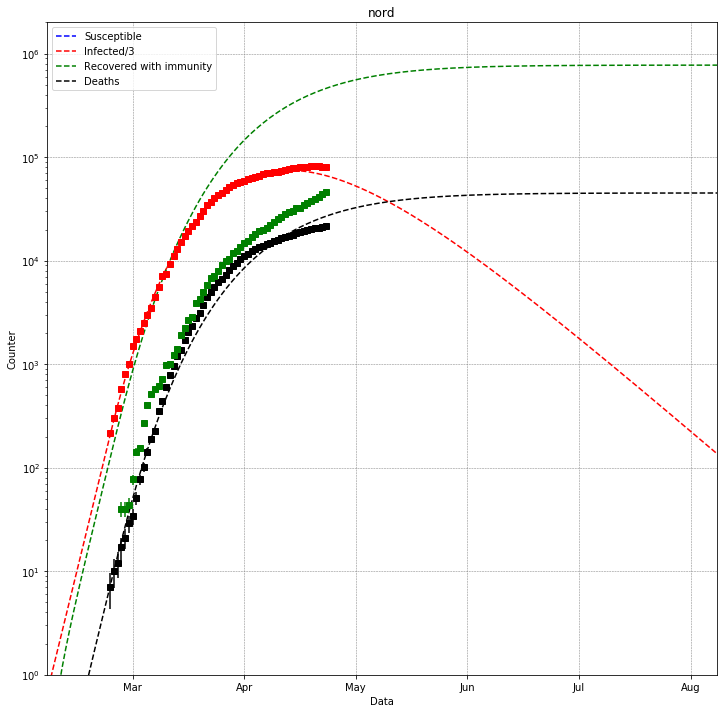

In [9]:
plt.figure(figsize=(12,12))
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t+dt, s_vec, 'b--', label='Susceptible')
#plt.plot(t+dt, i_vec, 'y--', label='Infected/3')
plt.plot(t+dt, i_vec/3, 'r--', label='Infected/3')
plt.plot(t+dt, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t+dt, m_vec, 'k--', label='Deaths')
plt.title(fit_region)
plt.yscale('log')
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(0,180)
plt.ylim(1,0.2*10**7)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('output/sirdatacomp_prediction_v3_'+fit_region+'.png',dpi=300)
plt.show()


# Combined plot

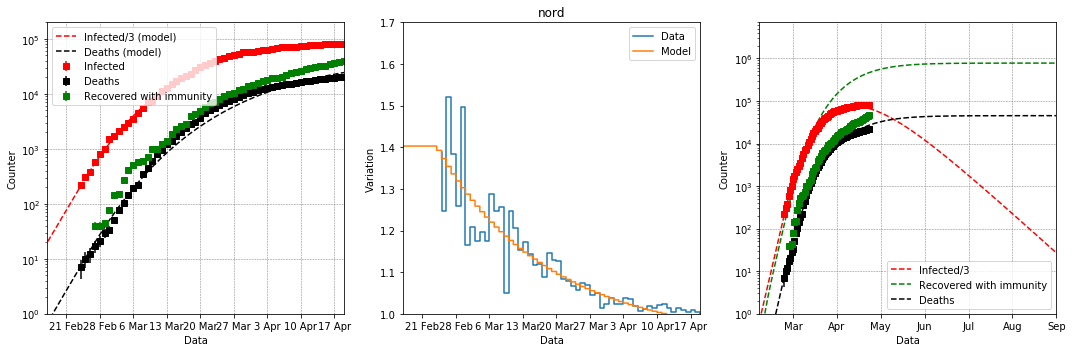

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t+dt, s_vec, 'b--')
plt.plot(t+dt, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t+dt, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t+dt, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,72,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'])
plt.xlim(10,72)
plt.ylim(1,2*10**5)
plt.xlabel('Data')
plt.ylabel('Counter')
if fit_region   == 'Nord' or fit_region   == 'NoLombardia' or fit_region   == 'Lombardia':
    plt.legend(loc=4)
else:
    plt.legend(loc=2)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.subplot(1,3,2)
plt.title(fit_region)
if fit_region   == 'Sud':
    plt.step(xdata[ydata>=1]+17,incremento,label='Data')
else:
    plt.step(xdata[xdata>=1]+17,incremento,label='Data')
#plt.step(xdata[ydata>1]+17,incremento,label='Data')
plt.step(t[1:]+dt,incr_SIR,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,72,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar','27 Mar','3 Apr','10 Apr','17 Apr'])
plt.xlim(10,72)
plt.ylim(1,1.7)
plt.legend()

plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t+dt, s_vec, 'b--', label='Susceptible')
plt.plot(t+dt, i_vec/3, 'r--', label='Infected/3')
plt.plot(t+dt, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t+dt, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,0.7*10**7)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('output/combined_SIR_v3_'+fit_region+'.png',dpi=300)
plt.show()

In [11]:
print('Total deaths ',int(m_vec[-1]))
print('Total infected ',int(m_vec[-1]+r_vec[-1]))
print('Maximum infected ',int(i_vec.max()/3))
print('Maximum infected (hospitalized)',int(i_vec.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec.max()/3*7/100))

Total deaths  45102
Total infected  820043
Maximum infected  74897
Maximum infected (hospitalized) 14979
Maximum infected (intensive care) 5242


# Export of the model

In [12]:
# Starting time for the model according to each region
if fit_region   ==   'nord':
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-07') 
elif fit_region == 'centro':
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-17')
elif fit_region ==    'sud':
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-19') 
elif fit_region ==  'isole':
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-23')
elif fit_region == 'italia': 
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-07')
elif fit_region == 'nolombardia': 
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-11')
elif fit_region == 'lombardia': 
    new_t  = pd.to_datetime(t,unit='D',origin='2020-02-07')

# Starting time for the data - All regions
data_t        = pd.to_datetime(xdata,unit='D',origin='2020-02-24') 

# Model dataframe
export = pd.DataFrame({'S':np.around(s_vec,0), 'I': np.around(i_vec,0), 'R':np.around(r_vec+m_vec,0), 'sintomatici_modello':np.around(i_vec/3,0)})
export.index = new_t

# Data dataframe
new_ydata_inf = pd.DataFrame({'sintomatici_data':np.around(ydata_inf,0)})
new_ydata_inf.index = data_t

# Join and export
joint_frames = export.join(new_ydata_inf,on=export.index)
export2 = joint_frames.iloc[:200,:]
export2.index.name='data'
export2.to_csv('output/export_'+fit_region+'_work.csv',index=True)


# Minimizer (one parameter)

In [17]:
def minimizer_1var(beta1):
    # Function to minimize: time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365))
    # Try to keep beta1 stable because is characteristic of the epidemy
    # Play with t_tresh, beta2 and death_rate
    # Results are plotted in the next cell
    
    fin_result=time_evo(N,0.41,beta1,1/14,5.5,t_tresh=17,I0=2,t=np.arange(0,720)) # Nord + 0 giorni
    dt = 0
    
    t    =fin_result[0]+dt
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check = i_vec[17-dt:17+len(ydata)-dt]/3
    data_check    = ydata_inf
    accuracy=round(np.mean(np.abs((data_check[data_check>=1]-modello_check[data_check>=1]))/data_check[data_check>=1])*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17-dt:17+len(ydata)-dt]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check[data_death_check>=1]-modello_death_check[data_death_check>=1]))/data_death_check[data_death_check>=1])*100,2)

    return accuracy, accuracy_death

minimizer_1var_vec=np.vectorize(minimizer_1var)

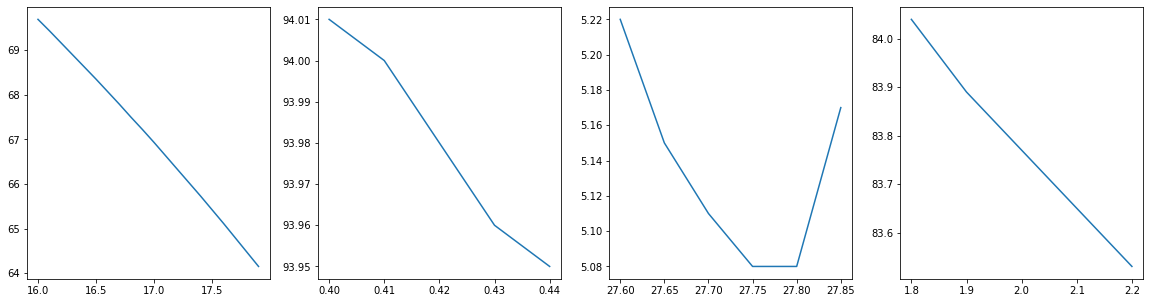

In [20]:
tgrid=np.arange(16,18,0.1)  # Grid for t_thres
beta1grid=np.arange(0.4,0.45,0.01)  # Grid for Beta1
#beta1grid=np.arange(1,10,0.1)          # Grid for dt
beta2grid=np.arange(27.6,27.9,0.05)      # Grid for Beta2
deathgrid=np.arange(1.8,2.2,0.1)  # Grid for Death rate

ty,q=minimizer_1var_vec(tgrid)
beta1y,q=minimizer_1var_vec(beta1grid)
beta2y,q=minimizer_1var_vec(beta2grid)
q,deathy=minimizer_1var_vec(deathgrid)


plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(tgrid,ty)

plt.subplot(1,4,2)
plt.plot(beta1grid,beta1y)

plt.subplot(1,4,3)
plt.plot(beta2grid,beta2y)

plt.subplot(1,4,4)
plt.plot(deathgrid,deathy)
plt.show()

# Comparison Lombardia Vs Rest of the country

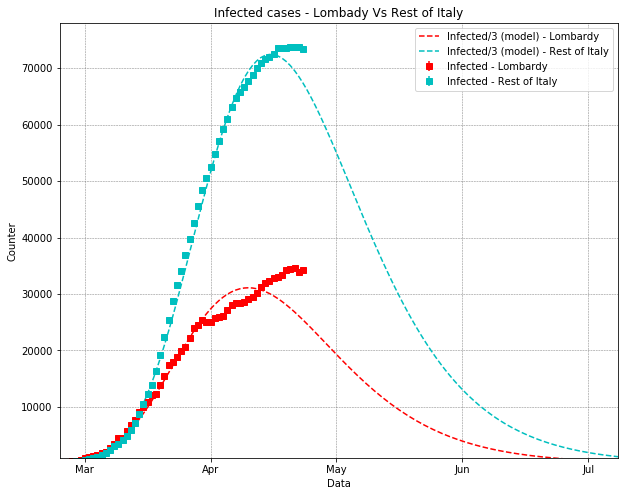

In [32]:
plt.figure(figsize=(10,8))

plt.errorbar(xdata_Lombardia,ydata_Lombardia,np.sqrt(ydata_Lombardia),color='red',linestyle='None',marker='s',label='Infected - Lombardy')
plt.plot(xmodel_Lombardia, ymodel_Lombardia, 'r--',label='Infected/3 (model) - Lombardy')

plt.errorbar(xdata_NoLombardia,ydata_NoLombardia,np.sqrt(ydata_NoLombardia),color='c',linestyle='None',marker='s',label='Infected - Rest of Italy')
plt.plot(xmodel_NoLombardia, ymodel_NoLombardia, 'c--',label='Infected/3 (model) - Rest of Italy')

plt.title('Infected cases - Lombady Vs Rest of Italy')
#plt.yscale('log')


plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(17,150)
plt.ylim(1000,7.8*10**4)

#plt.xlim(60,75)

#plt.ylim(70000,74000)
#plt.ylim(27000,35000)



plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)



plt.savefig('output/infected_Lombardia_NoLombardia_lin.png',dpi=300)
plt.show()

In [33]:
print(ydata_NoLombardia)

[   55    80   136   239   347   497   690   758   937  1209  1519  1908
  2319  3015  3495  4087  4827  5943  7223  8691 10560 12212 13967 16444
 19252 22440 25311 28753 31508 34162 36930 39824 42519 45556 48488 50522
 52511 54807 57173 59199 61054 63122 64718 65724 66717 67803 68743 70011
 70988 71681 71928 72497 73517 73528 73576 73760 73650 73731 73457]


In [34]:
print(ydata_Lombardia)

[  166   231   249   349   474   552   887  1077  1326  1497  1777  2008
  2742  3372  4490  4427  5763  6896  7732  9059 10043 10861 12095 12266
 13938 15420 17370 17885 18910 19868 20591 22189 23895 24509 25392 25006
 25124 25765 25876 26189 27220 28124 28469 28343 28545 29074 29530 30258
 31265 31935 32363 32921 33090 33434 34195 34497 34587 33978 34242]
